# Group 1 Data Science Project on US Covid-19
### Group Members:  GOH JIA WERN, HONG WEIDONG, NG HAN KIAT, TEE YING HONG

The United States (US) national death toll passed 964000 on the 2nd anniversary of Covid-19, making the US one of the countries with the highest death rate among the higher income nations. Though the number of cases is receding, over 1,200 individuals still die from Covid-19 everyday. As such, understanding the daily death tolls of the states has become an important parameter for researchers to monitor the impact of the disease and to guide responses. 

In this project, we will peform an analysis on the most populous US state and create a model to predict the number of deaths the state will be facing for the first week of April. Analysis is perform through Data Cleaning, Exploratory Analysis and Regression. Death count result obtained from our model is compared with actual data released by CDC.

We will be using 5 csv files:

1:  united_states_covid19_cases_deaths_and_testing_by_state.csv 

2:  covid19_vaccinations_in_the_united_states.csv

3:  United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv

4:  COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv

5:  April Covid Data.csv

The purpose of having File 1 and 2 is to allow us to have an overview of the summarised states data provided by CDC. Actual prediction is perform using the daily case datass in File 3, 4 and 5

Please install the following files beforehand:

missing no :  conda install -c conda-forge missingno

plotly     :  conda install -c plotly plotly

XGBoost    :  conda install -c conda-forge xgboost


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from numpy import where
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Data Preparation

### State's Total Covid  Dataset

In [2]:
statecase = pd.read_csv('united_states_covid19_cases_deaths_and_testing_by_state.csv')

# Drop variables that are not a state of USA
cleanstatecase = statecase.drop(labels=[35,52],axis=0,)
cleanstatecase.reset_index(drop=True, inplace = True)

# Change state's name such that both state's total covid dataset has the same state's names
cleanstatecase['State/Territory'] = cleanstatecase['State/Territory'].replace(['New York*','Republic of Marshall Islands'],
                                                                                ['New York','Marshall Islands'])
cleanstatecase.head()

State/Territory  Total Cases  Confirmed Cases  Probable Cases  \
0         Alabama    1294301.0         931750.0        362551.0   
1          Alaska     238420.0              0.0             0.0   
2  American Samoa       2262.0              0.0             0.0   
3         Arizona    1997037.0        1765278.0        231759.0   
4        Arkansas     832394.0              0.0             0.0   

   Cases in Last 7 Days  Case Rate per 100000  Total Deaths  Confirmed Deaths  \
0                2901.0               26397.0       19234.0           14768.0   
1                1455.0               32591.0        1189.0               NaN   
2                1074.0                4773.0           1.0               NaN   
3                4566.0               27437.0       28883.0           24458.0   
4                3505.0               27583.0       11203.0               NaN   

   Probable Deaths  Deaths in Last 7 Days  ...  % Positive Last 30 Days  \
0           4466.0                   62.0  ...                   3-4.9%   
1              NaN                   20.0  ...                   5-7.9%   
2              NaN                    1.0  ...                      NaN   
3           4425.0                  336.0  ...                   3-4.9%   
4              NaN                  150.0  ...                   3-4.9%   

   % Positive Last 7 Days  # Tests per 100K Total # Tests  \
0                    < 3%       150715.3464     7417504.0   
1                  5-7.9%       564736.0762     4129113.0   
2                     NaN               NaN           NaN   
3                    < 3%       194324.4409    14421596.0   
4                    < 3%       153387.7662     4648450.0   

  # Tests per 100K Last 7 Days Total # Tests Last 7 Days  \
0                       810.36                   39882.0   
1                       457.90                    3348.0   
2                          NaN                       NaN   
3                       965.10                   71624.0   
4                       756.57                   22928.0   

   # Tests per 100K Last 30 Days  Total # Tests Last 30 Days  New Cases  \
0                        3576.12                    176000.0     1787.0   
1                        2060.98                     15069.0      537.0   
2                            NaN                         NaN        0.0   
3                        4670.51                    346617.0        0.0   
4                        3205.16                     97133.0      189.0   

   New Deaths  
0        24.0  
1         0.0  
2         0.0  
3         0.0  
4        38.0  

[5 rows x 24 columns]

In [3]:
vaccinestate = pd.read_csv('covid19_vaccinations_in_the_united_states.csv')

# Drop variables that are not a state of USA
cleanvaccinestate = vaccinestate.drop(labels=[0,6,11,20,57],axis=0,)
cleanvaccinestate.reset_index(drop=True, inplace = True)

# Change column name such that both state's total covid dataset common columns have the same name
cleanvaccinestate.rename(columns = {'State/Territory/Federal Entity':'State/Territory'}, inplace = True)

# Change state's name such that both state's total covid dataset has the same state's names
cleanvaccinestate['State/Territory'] = cleanvaccinestate['State/Territory'].replace(['New York State'],['New York'])
cleanvaccinestate['State/Territory'] = cleanvaccinestate['State/Territory'].replace(['Republic of Palau'],['Palau'])
cleanvaccinestate.head()

State/Territory  Total Doses Delivered  Doses Delivered per 100K  \
0          Alaska                1482265                  202621.0   
1         Alabama                9396740                  191646.0   
2        Arkansas                5952680                  197252.0   
3  American Samoa                 114610                  241834.0   
4         Arizona               14312020                  196628.0   

   18+ Doses Delivered per 100K  \
0                      268740.0   
1                      246318.0   
2                      256841.0   
3                      365757.0   
4                      253828.0   

   Total Doses Administered by State where Administered  \
0                                            1113386      
1                                            6154128      
2                                            4131074      
3                                             102883      
4                                           11746475      

   Doses Administered per 100k by State where Administered  \
0                                           152197.0         
1                                           125513.0         
2                                           136890.0         
3                                           217089.0         
4                                           161381.0         

   18+ Doses Administered by State where Administered  \
0                                             998300    
1                                            5744279    
2                                            3767302    
3                                              76301    
4                                           10573581    

   18+ Doses Administered per 100K by State where Administered  \
0                                           180995.0             
1                                           150576.0             
2                                           162548.0             
3                                           243501.0             
4                                           187525.0             

   People with at least One Dose by State of Residence  \
0                                             506076     
1                                            3051334     
2                                            1995676     
3                                              44602     
4                                            5255628     

   Percent of Total Pop with at least One Dose by State of Residence  ...  \
0                                               69.2                  ...   
1                                               62.2                  ...   
2                                               66.1                  ...   
3                                               94.1                  ...   
4                                               72.2                  ...   

   Percent People Primary Moderna Booster J&J  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Percent People Primary Moderna Booster Other  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Percent People Primary J&J Booster Pfizer  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Percent People Primary J&J Booster Moderna  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3  

<AxesSubplot:>

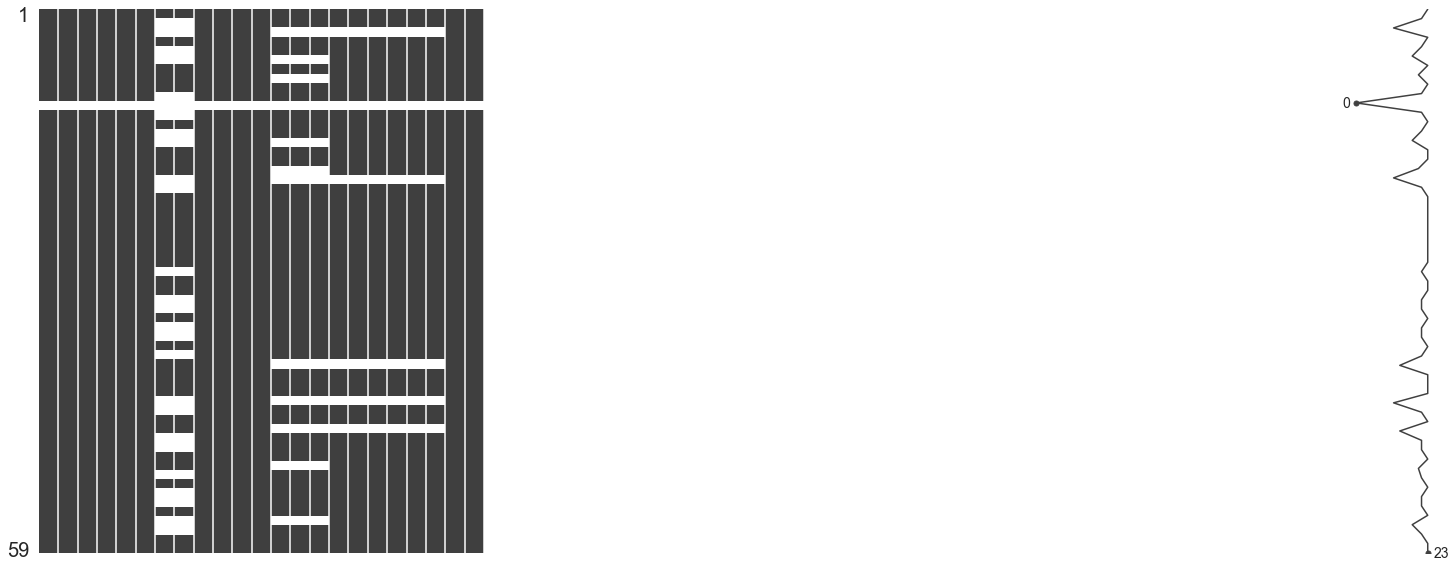

In [4]:
# Combine casesTrend and vaccineTrend datasets into a single dataset
combinestateDF = pd.concat([cleanstatecase, cleanvaccinestate], axis = 1).reindex(cleanstatecase.index)

# Visualise missing datas
missingdata_df = combinestateDF.columns[combinestateDF.isnull().any()].tolist()
msno.matrix(combinestateDF[missingdata_df])

In [5]:
# Replace Null values with 0
covidstateDF = combinestateDF.fillna(0)

# Drop columns that contains only "0" 
covidstateDF.drop(covidstateDF.columns[109:150], axis=1, inplace=True)

<AxesSubplot:>

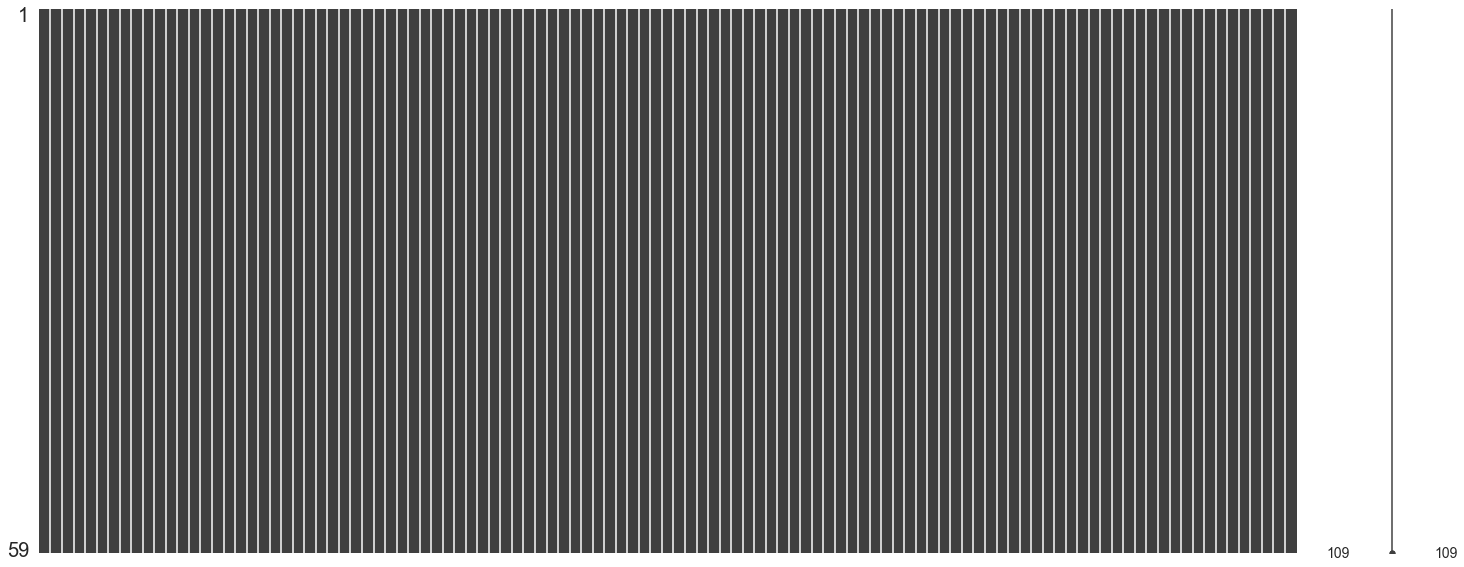

In [6]:
# Visualise missing datas after cleaning
msno.matrix(covidstateDF)

### Daily datasets of every states

In [7]:
casesTrend = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
casesTrend.head()

submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
0         22/1/20    GA          0         NaN         NaN         0   
1         22/1/20    OK          0         NaN         NaN         0   
2         22/1/20   NYC          0         NaN         NaN         0   
3         22/1/20    WV          0         NaN         NaN         0   
4         22/1/20    MA          0         NaN         NaN         0   

   pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
0        NaN          0         NaN         NaN          0         NaN   
1        NaN          0         NaN         NaN          0         NaN   
2        NaN          0         NaN         NaN          0         NaN   
3        NaN          0         NaN         NaN          0         NaN   
4        NaN          0         NaN         NaN          0         NaN   

               created_at consent_cases consent_deaths  
0  03/26/2020 04:22:39 PM         Agree          Agree  
1  03/26/2020 04:22:39 PM     Not agree          Agree  
2  03/26/2020 04:22:39 PM         Agree          Agree  
3  03/26/2020 04:22:39 PM         Agree      Not agree  
4  03/26/2020 04:22:39 PM         Agree          Agree

In [8]:
#Rename date column
casesTrend.rename(columns = {'submission_date':'Date'}, inplace = True)

In [9]:
vaccineTrend = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
vaccineTrend.head()

Date  MMWR_week Location  Distributed  Distributed_Janssen  \
0  13/12/20         51       AS         3900                    0   
1  13/12/20         51       MP         4875                    0   
2  13/12/20         51      LTC            0                    0   
3  13/12/20         51       VI          975                    0   
4  13/12/20         51       US        13650                    0   

   Distributed_Moderna  Distributed_Pfizer  Distributed_Unk_Manuf  \
0                    0                   0                      0   
1                    0                   0                      0   
2                    0                   0                      0   
3                    0                   0                      0   
4                    0                   0                      0   

   Dist_Per_100K  Distributed_Per_100k_12Plus  ...  \
0           7003                            0  ...   
1           8570                            0  ...   
2              0                            0  ...   
3            931                            0  ...   
4              4                            0  ...   

   Series_Complete_5PlusPop_Pct  Administered_5Plus  Admin_Per_100k_5Plus  \
0                           0.0                 0.0                   0.0   
1                           0.0                 0.0                   0.0   
2                           0.0                 0.0                   0.0   
3                           0.0                 0.0                   0.0   
4                           0.0                 0.0                   0.0   

   Distributed_Per_100k_5Plus  Series_Complete_Moderna_5Plus  \
0                         0.0                            NaN   
1                         0.0                            NaN   
2                         0.0                            NaN   
3                         0.0                            NaN   
4                         0.0                            NaN   

   Series_Complete_Pfizer_5Plus  Series_Complete_Janssen_5Plus  \
0                           NaN                            NaN   
1                           NaN                            NaN   
2                           NaN                            NaN   
3                           NaN                            NaN   
4                           NaN                            NaN   

   Series_Complete_Unk_Manuf_5Plus  Unnamed: 82  Unnamed: 83  
0                              NaN          NaN          NaN  
1                              NaN          NaN          NaN  
2                              NaN          NaN          NaN  
3                              NaN          NaN          NaN  
4                              NaN          NaN          NaN  

[5 rows x 84 columns]

In [10]:
# Drop columns 
vaccineTrend.drop(['MMWR_week'], axis=1, inplace=True)
vaccineTrend.head()

#Rename location column
vaccineTrend.rename(columns = {'Location':'state'}, inplace = True)

In [11]:
# Drop rows that are not an US State
vaccineTrend[vaccineTrend['state'].str.contains('LTC|BP2|DD2|IH2|VA2')==False]

Date state  Distributed  Distributed_Janssen  Distributed_Moderna  \
0      13/12/20    AS         3900                    0                    0   
1      13/12/20    MP         4875                    0                    0   
3      13/12/20    VI          975                    0                    0   
4      13/12/20    US        13650                    0                    0   
5      13/12/20    GU         3900                    0                    0   
...         ...   ...          ...                  ...                  ...   
30610    1/4/22    IA      6367855               288800              2439420   
30612    1/4/22    AR      5957280               252200              2490720   
30613    1/4/22    IN     12959880               599000              4553800   
30614    1/4/22    WI     11219245               450900              4187800   
30615    1/4/22    VI       147160                 2900                38840   

       Distributed_Pfizer  Distributed_Unk_Manuf  Dist_Per_100K  \
0                       0                      0           7003   
1                       0                      0           8570   
3                       0                      0            931   
4                       0                      0              4   
5                       0                      0           2353   
...                   ...                    ...            ...   
30610             3639635                      0         201829   
30612             3214360                      0         197404   
30613             7807080                      0         192505   
30614             6580545                      0         192690   
30615              105420                      0         138451   

       Distributed_Per_100k_12Plus  Distributed_Per_100k_18Plus  ...  \
0                                0                            0  ...   
1                                0                            0  ...   
3                                0                            0  ...   
4                                0                            0  ...   
5                                0                            0  ...   
...                            ...                          ...  ...   
30610                       237937                       262243  ...   
30612                       232957                       257040  ...   
30613                       227165                       250954  ...   
30614                       224394                       246261  ...   
30615                       164562                       180549  ...   

       Series_Complete_5PlusPop_Pct  Administered_5Plus  Admin_Per_100k_5Plus  \
0                               0.0                 0.0                   0.0   
1                               0.0                 0.0                   0.0   
3                               0.0                 0.0                   0.0   
4                               0.0                 0.0                   0.0   
5                               0.0                 0.0                   0.0   
...                             ...                 ...                   ...   
30610                          66.0           4975923.0              168138.0   
30612                          58.0           4136193.0              146189.0   
30613                          58.0           9320352.0              147617.0   
30614                          69.0           9982515.0              181767.0   
30615                          57.0            141521.0              142055.0   

       Distributed_Per_100k_5Plus  Series_Complete_Moderna_5Plus  \
0                             0.0                            NaN   
1                             0.0                            NaN   
3                             0.0                            NaN   
4                             0.0                            NaN   
5                             0.0                            NaN   

In [12]:
# Combine casesTrend and vaccineTrend datasets into a single dataset
combineDF = pd.merge(casesTrend, vaccineTrend, on=['Date','state'])
combineDF

Date state  tot_cases  conf_cases  prob_cases  new_case  pnew_case  \
0      13/12/20    GU       7137         NaN         NaN        58       22.0   
1      13/12/20    VI       1807         NaN         NaN         0        0.0   
2      13/12/20    AS          3         NaN         NaN         0        0.0   
3      13/12/20    MP        113       113.0         0.0         0        0.0   
4      14/12/20    WV      64394     53741.0     10653.0      1177      262.0   
...         ...   ...        ...         ...         ...       ...        ...   
26544   31/3/22    PR     480576    269643.0    210933.0       495      326.0   
26545   31/3/22    WV     497769    394874.0    102895.0        88       17.0   
26546   31/3/22    OH    2672801   2070097.0    602704.0      3103     1282.0   
26547   31/3/22    SD     237109         NaN         NaN         0        0.0   
26548   31/3/22    NM     517858         NaN         NaN       116        0.0   

       tot_death  conf_death  prob_death  ...  Series_Complete_5PlusPop_Pct  \
0            119         NaN         NaN  ...                           0.0   
1             23         NaN         NaN  ...                           0.0   
2              0         NaN         NaN  ...                           0.0   
3              2         2.0         0.0  ...                           0.0   
4            978         NaN         NaN  ...                           0.0   
...          ...         ...         ...  ...                           ...   
26544       4170      3473.0       697.0  ...                          85.0   
26545       6831         NaN         NaN  ...                          60.0   
26546      38042     38042.0         0.0  ...                          62.0   
26547       2883      2883.0         0.0  ...                          65.0   
26548       7274         NaN         NaN  ...                          75.0   

       Administered_5Plus Admin_Per_100k_5Plus Distributed_Per_100k_5Plus  \
0                     0.0                  0.0                        0.0   
1                     0.0                  0.0                        0.0   
2                     0.0                  0.0                        0.0   
3                     0.0                  0.0                        0.0   
4                     0.0                  0.0                        0.0   
...                   ...                  ...                        ...   
26544           7082432.0             230232.0                   238200.0   
26545           2659683.0             156533.0                   231151.0   
26546          17409534.0             158293.0                   203557.0   
26547           1373958.0             166845.0                   218759.0   
26548           3823000.0             193487.0                   218091.0   

      Series_Complete_Moderna_5Plus  Series_Complete_Pfizer_5Plus  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
26544                      951366.0                     1533194.0   
26545                      419818.0                      543308.0   
26546                     2382086.0                     3847203.0   
26547                      195786.0                      300560.0   
26548                      557555.0                      805641.0   

       Series_Complete_Janssen_5Plus  Series_Complete_Unk_Manuf_5Plus  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                NaN       

In [13]:
# Check for number of null values in dataset
print('combineDF Dataset has {} null values'.format(sum(combineDF.isnull().sum())))

combineDF Dataset has 243577 null values


<AxesSubplot:>

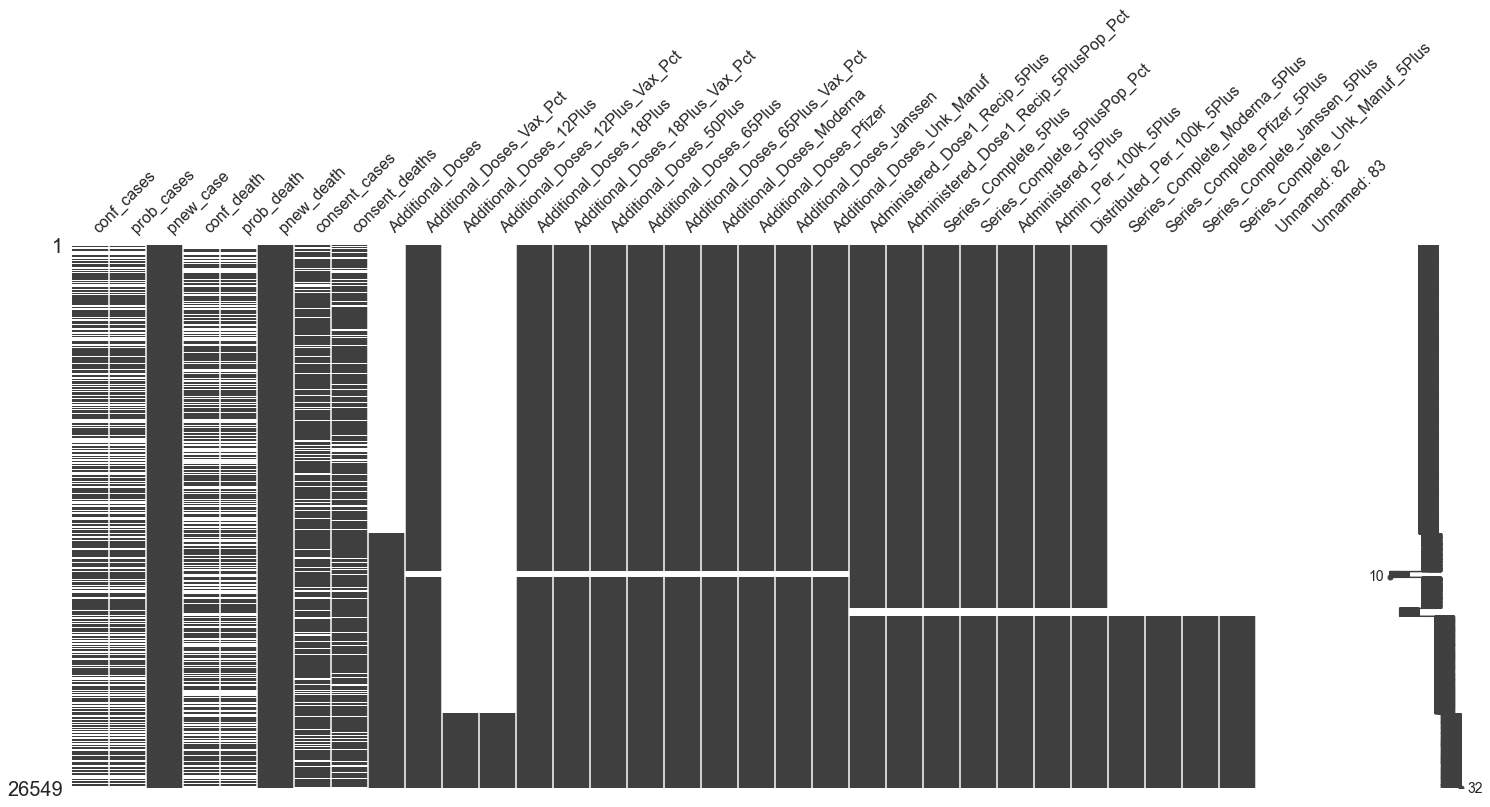

In [14]:
# Visualise missing datas
missingdata_df = combineDF.columns[combineDF.isnull().any()].tolist()
msno.matrix(combineDF[missingdata_df])

In [15]:
# Replace Null values with 0
dailycovidDF = combineDF.fillna(0)

# Check if null values still exist in dataset
print('covidDF Dataset has {} null values'.format(sum(dailycovidDF.isnull().sum())))

covidDF Dataset has 0 null values


<AxesSubplot:>

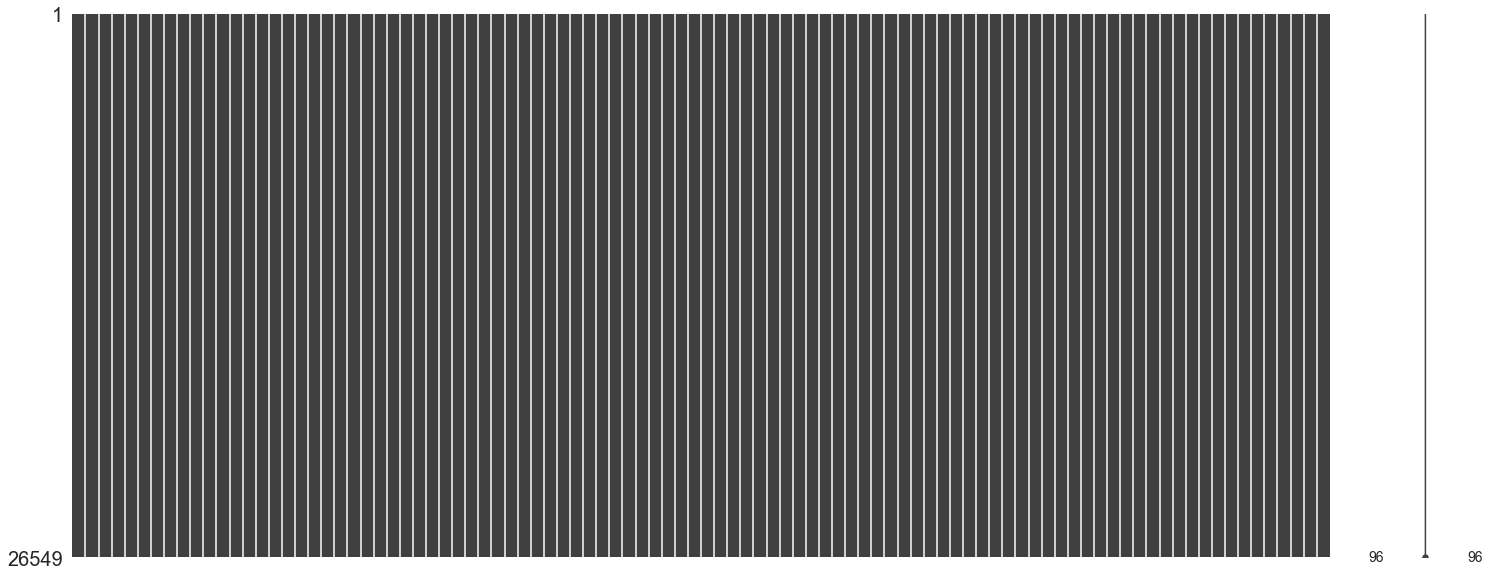

In [16]:
# Visualise data after cleaning
msno.matrix(dailycovidDF)

# Exploratory Analysis

In [17]:
# Function to print the death count of each state
def printdeath(x):
    statename = dailycovidDF[dailycovidDF['state'] == x]
    statedeath = statename['tot_death'].max()
    return statedeath

In [18]:
statenames = ['AL','AK','AS','AZ','AR','CA','CO','CT','DE','DC','FSM','FL','GA','GU',
            'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
            'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','MP','OH',
            'OK','OR','PW','PA','PR','MH','RI','SC','SD','TN','TX','UT','VT',
            'VA','VI','WA','WV','WI','WY']
val = []
for i in statenames:
    val.append(printdeath(i))

#append death and statename into a single dataframe for map plotting
appendtodeathdata = {'State': statenames}
deathDF = pd.DataFrame(appendtodeathdata)
deathDF.insert(1,'Death Count',val)
deathDF.head()

State  Death Count
0    AL      19313.0
1    AK       1195.0
2    AS          4.0
3    AZ      29268.0
4    AR      11230.0

In [19]:
#Map plotting for deaths
fig = px.choropleth(deathDF,
                    locations = 'State',
                    locationmode  = 'USA-states',
                    scope = 'usa',
                    color= 'Death Count',
                    hover_name = 'Death Count',
                    hover_data = ['Death Count'],
                    range_color = [0,100000] ,
                    color_continuous_scale = 'ylorrd',
                    title = 'USA Death Count'

                   )
fig.show()

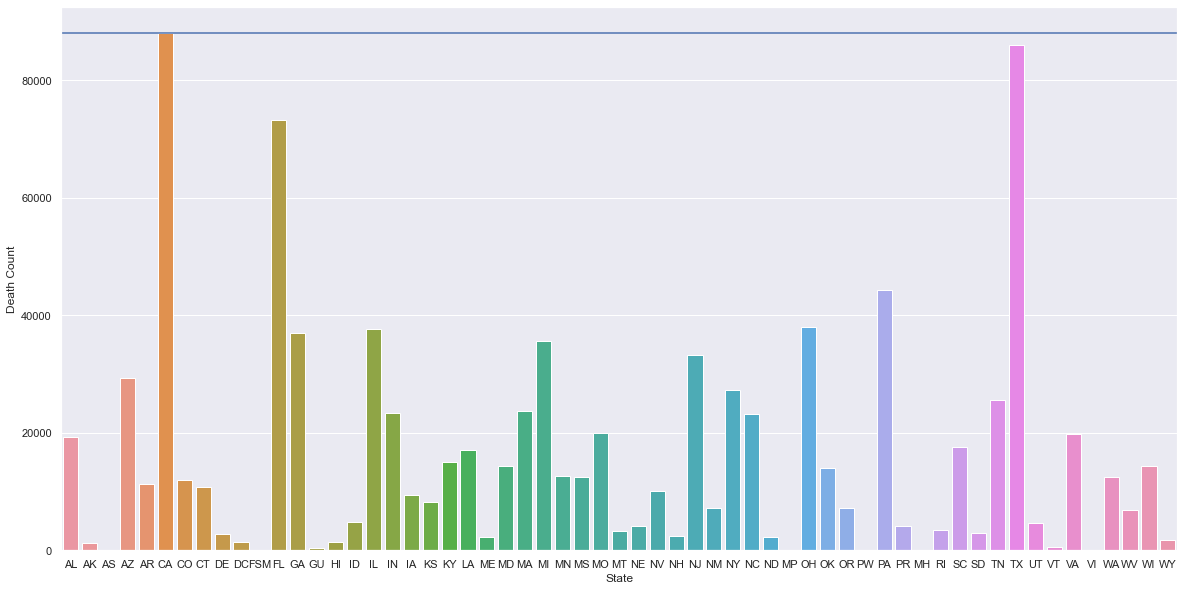

In [20]:
# Another view of Death counts
f=plt.figure(figsize=(20,10))
deathbarplot=sb.barplot(data=deathDF, x='State', y='Death Count')
deathbarplot.axhline(88000)

In [21]:
# Data for plotting total doses administered by state
data1=covidstateDF.iloc[:,0:24] 
print(data1.shape) 
data2=covidstateDF.iloc[:,24:] 
print(data2.shape)

# Merged columns 0 and 24 to standardise 'State/Territory'
newcovidDF=data1.merge(data2, how='outer', on='State/Territory')
print(newcovidDF.shape)

(59, 24)
(59, 85)
(59, 108)


In [22]:
# Map plot for Cases
casescountDF=newcovidDF[['State/Territory', 'Total Cases']]
casescountDF=pd.concat([casescountDF,deathDF['State']], axis=1)
fig = px.choropleth(casescountDF, locations='State', scope="usa", locationmode = 'USA-states',
                    color='Total Cases', color_continuous_scale="Blues",
                    range_color=(0, 8000000),
                    title='Total Cases by State'
                    )

fig.show()

In [23]:
vaccinebystate=newcovidDF[['State/Territory',
                           'Total Deaths',
                           'Total Cases',
                           'Total Doses Administered by State where Administered', 
                           'Total Number of Janssen doses administered', 
                           'Total Number of Moderna doses administered', 
                           'Total Number of Pfizer doses adminstered', 
                           'Total Number of doses from Other manufacturer administered']]
vaccinebystate.head()

State/Territory  Total Deaths  Total Cases  \
0         Alabama       19234.0    1294301.0   
1          Alaska        1189.0     238420.0   
2  American Samoa           1.0       2262.0   
3         Arizona       28883.0    1997037.0   
4        Arkansas       11203.0     832394.0   

   Total Doses Administered by State where Administered  \
0                                            6154128      
1                                            1113386      
2                                             102883      
3                                           11746475      
4                                            4131074      

   Total Number of Janssen doses administered  \
0                                      176292   
1                                       46367   
2                                         565   
3                                      366465   
4                                      122456   

   Total Number of Moderna doses administered  \
0                                     2678790   
1                                      428398   
2                                       23894   
3                                     4609192   
4                                     1762004   

   Total Number of Pfizer doses adminstered  \
0                                   3298536   
1                                    637500   
2                                     77856   
3                                   6743391   
4                                   2242631   

   Total Number of doses from Other manufacturer administered  
0                                                510           
1                                               1121           
2                                                568           
3                                              27427           
4                                               3983

In [24]:
# data for finding correlation of vaccine type against cases/deaths
vaccinebystatecopy=vaccinebystate.copy()
vaccinebystatecopy['Total Cases of Vaccinated People']=vaccinebystate['Total Cases'] * cleanvaccinestate['Percent of Total Pop Fully Vaccinated by State of Residence'] *0.01
vaccinebystatecopy['Total Cases of Vaccinated People'] = vaccinebystatecopy['Total Cases of Vaccinated People'].round ()
vaccinebystatecopy['% Janssen doses']=vaccinebystate['Total Number of Janssen doses administered']/ vaccinebystate['Total Doses Administered by State where Administered']
vaccinebystatecopy['% Moderna doses']=vaccinebystate['Total Number of Moderna doses administered']/ vaccinebystate['Total Doses Administered by State where Administered']
vaccinebystatecopy['% Pfizer doses']=vaccinebystate['Total Number of Pfizer doses adminstered']/ vaccinebystate['Total Doses Administered by State where Administered']
vaccinebystatecopy['% Other Manufacturer doses']=vaccinebystate['Total Number of doses from Other manufacturer administered']/ vaccinebystate['Total Doses Administered by State where Administered']
vaccinebystatecopy.drop(vaccinebystatecopy.columns[3:7], axis=1, inplace=True)
vaccinebystatecopy.head()

State/Territory  Total Deaths  Total Cases  \
0         Alabama       19234.0    1294301.0   
1          Alaska        1189.0     238420.0   
2  American Samoa           1.0       2262.0   
3         Arizona       28883.0    1997037.0   
4        Arkansas       11203.0     832394.0   

   Total Number of doses from Other manufacturer administered  \
0                                                510            
1                                               1121            
2                                                568            
3                                              27427            
4                                               3983            

   Total Cases of Vaccinated People  % Janssen doses  % Moderna doses  \
0                          797289.0         0.028646         0.435283   
1                          120641.0         0.041645         0.384770   
2                            1219.0         0.005492         0.232244   
3                         1695484.0         0.031198         0.392389   
4                          506928.0         0.029643         0.426524   

   % Pfizer doses  % Other Manufacturer doses  
0        0.535988                    0.000083  
1        0.572578                    0.001007  
2        0.756743                    0.005521  
3        0.574078                    0.002335  
4        0.542869                    0.000964

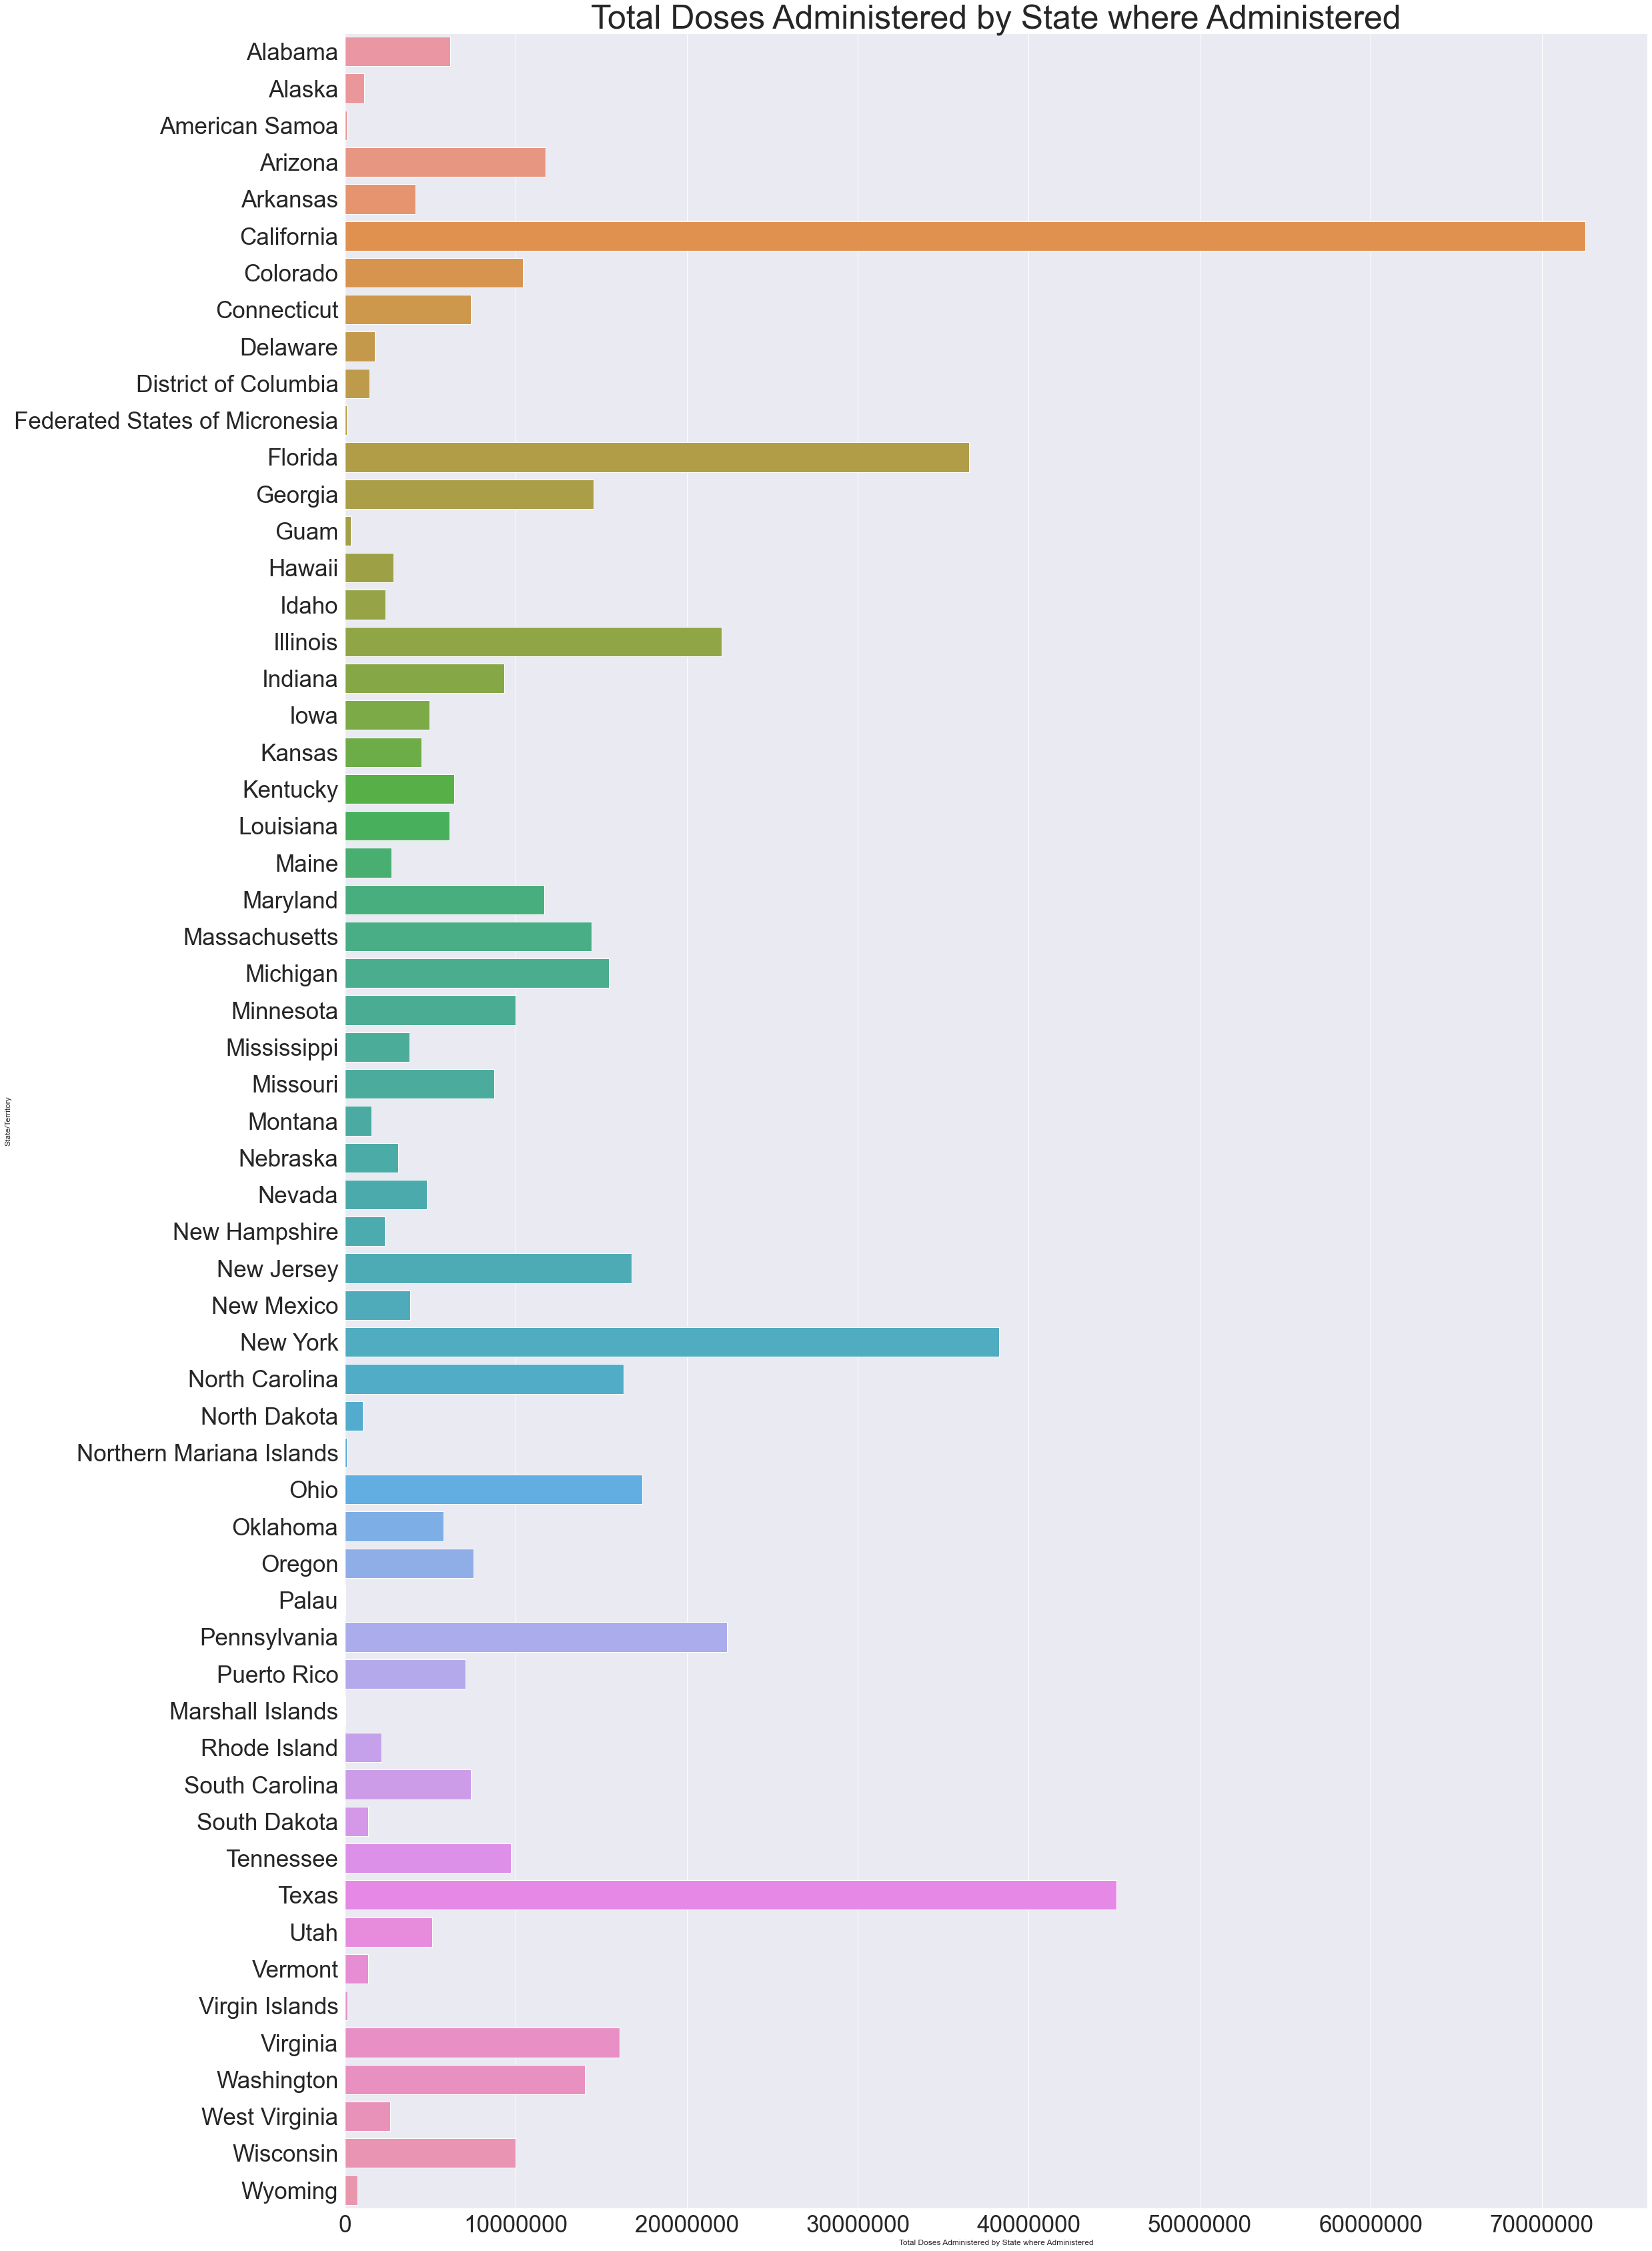

Total Deaths  Total Cases  \
count        59.000       59.000   
mean      15834.254  1312981.576   
std       19384.034  1642966.923   
min           0.000        0.000   
25%        2641.000   249428.500   
50%       10759.000   794093.000   
75%       19973.000  1678005.000   
max       87809.000  9074163.000   

       Total Doses Administered by State where Administered  \
count                                             59.000      
mean                                         9454766.661      
std                                         12579454.193      
min                                            47052.000      
25%                                          1954449.500      
50%                                          5780216.000      
75%                                         11711673.000      
max                                         72551454.000      

       Total Number of Janssen doses administered  \
count                                      59.000   
mean                                   311328.169   
std                                    427599.134   
min                                       565.000   
25%                                     63494.500   
50%                                    177719.000   
75%                                    359442.500   
max                                   2295449.000   

       Total Number of Moderna doses administered  \
count                                      59.000   
mean                                  3549342.356   
std                                   4639193.466   
min                                     14747.000   
25%                                    745159.000   
50%                                   2330404.000   
75%                                   4412499.000   
max                                  27019382.000   

       Total Number of Pfizer doses adminstered  \
count                                    59.000   
mean                                5585188.254   
std                                 7511598.647   
min                                    8289.000   
25%                                 1143887.000   
50%                                 3295001.000   
75%                                 6911883.500   
max                                43221074.000   

       Total Number of doses from Other manufacturer administered  
count                                             59.000           
mean                                            8907.881           
std                                            20291.985           
min                                                0.000           
25%                                              550.500           
50%                                             2157.000           
75%                                             7682.000           
max                                           136910.000

In [25]:
def plotbarfortotaldoses():
    plt.rcParams["figure.figsize"] = (35,60)
    sb.barplot(data=vaccinebystatecopy, y='State/Territory', x=vaccinebystate['Total Doses Administered by State where Administered'])
    plt.title('Total Doses Administered by State where Administered', fontsize=50)
    plt.ticklabel_format(useOffset=False, axis='x', style='plain')
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)
    plt.show()
    return
    
plotbarfortotaldoses()

pd.set_option('display.float_format', lambda x: '%.3f' % x)
vaccinebystate.describe()

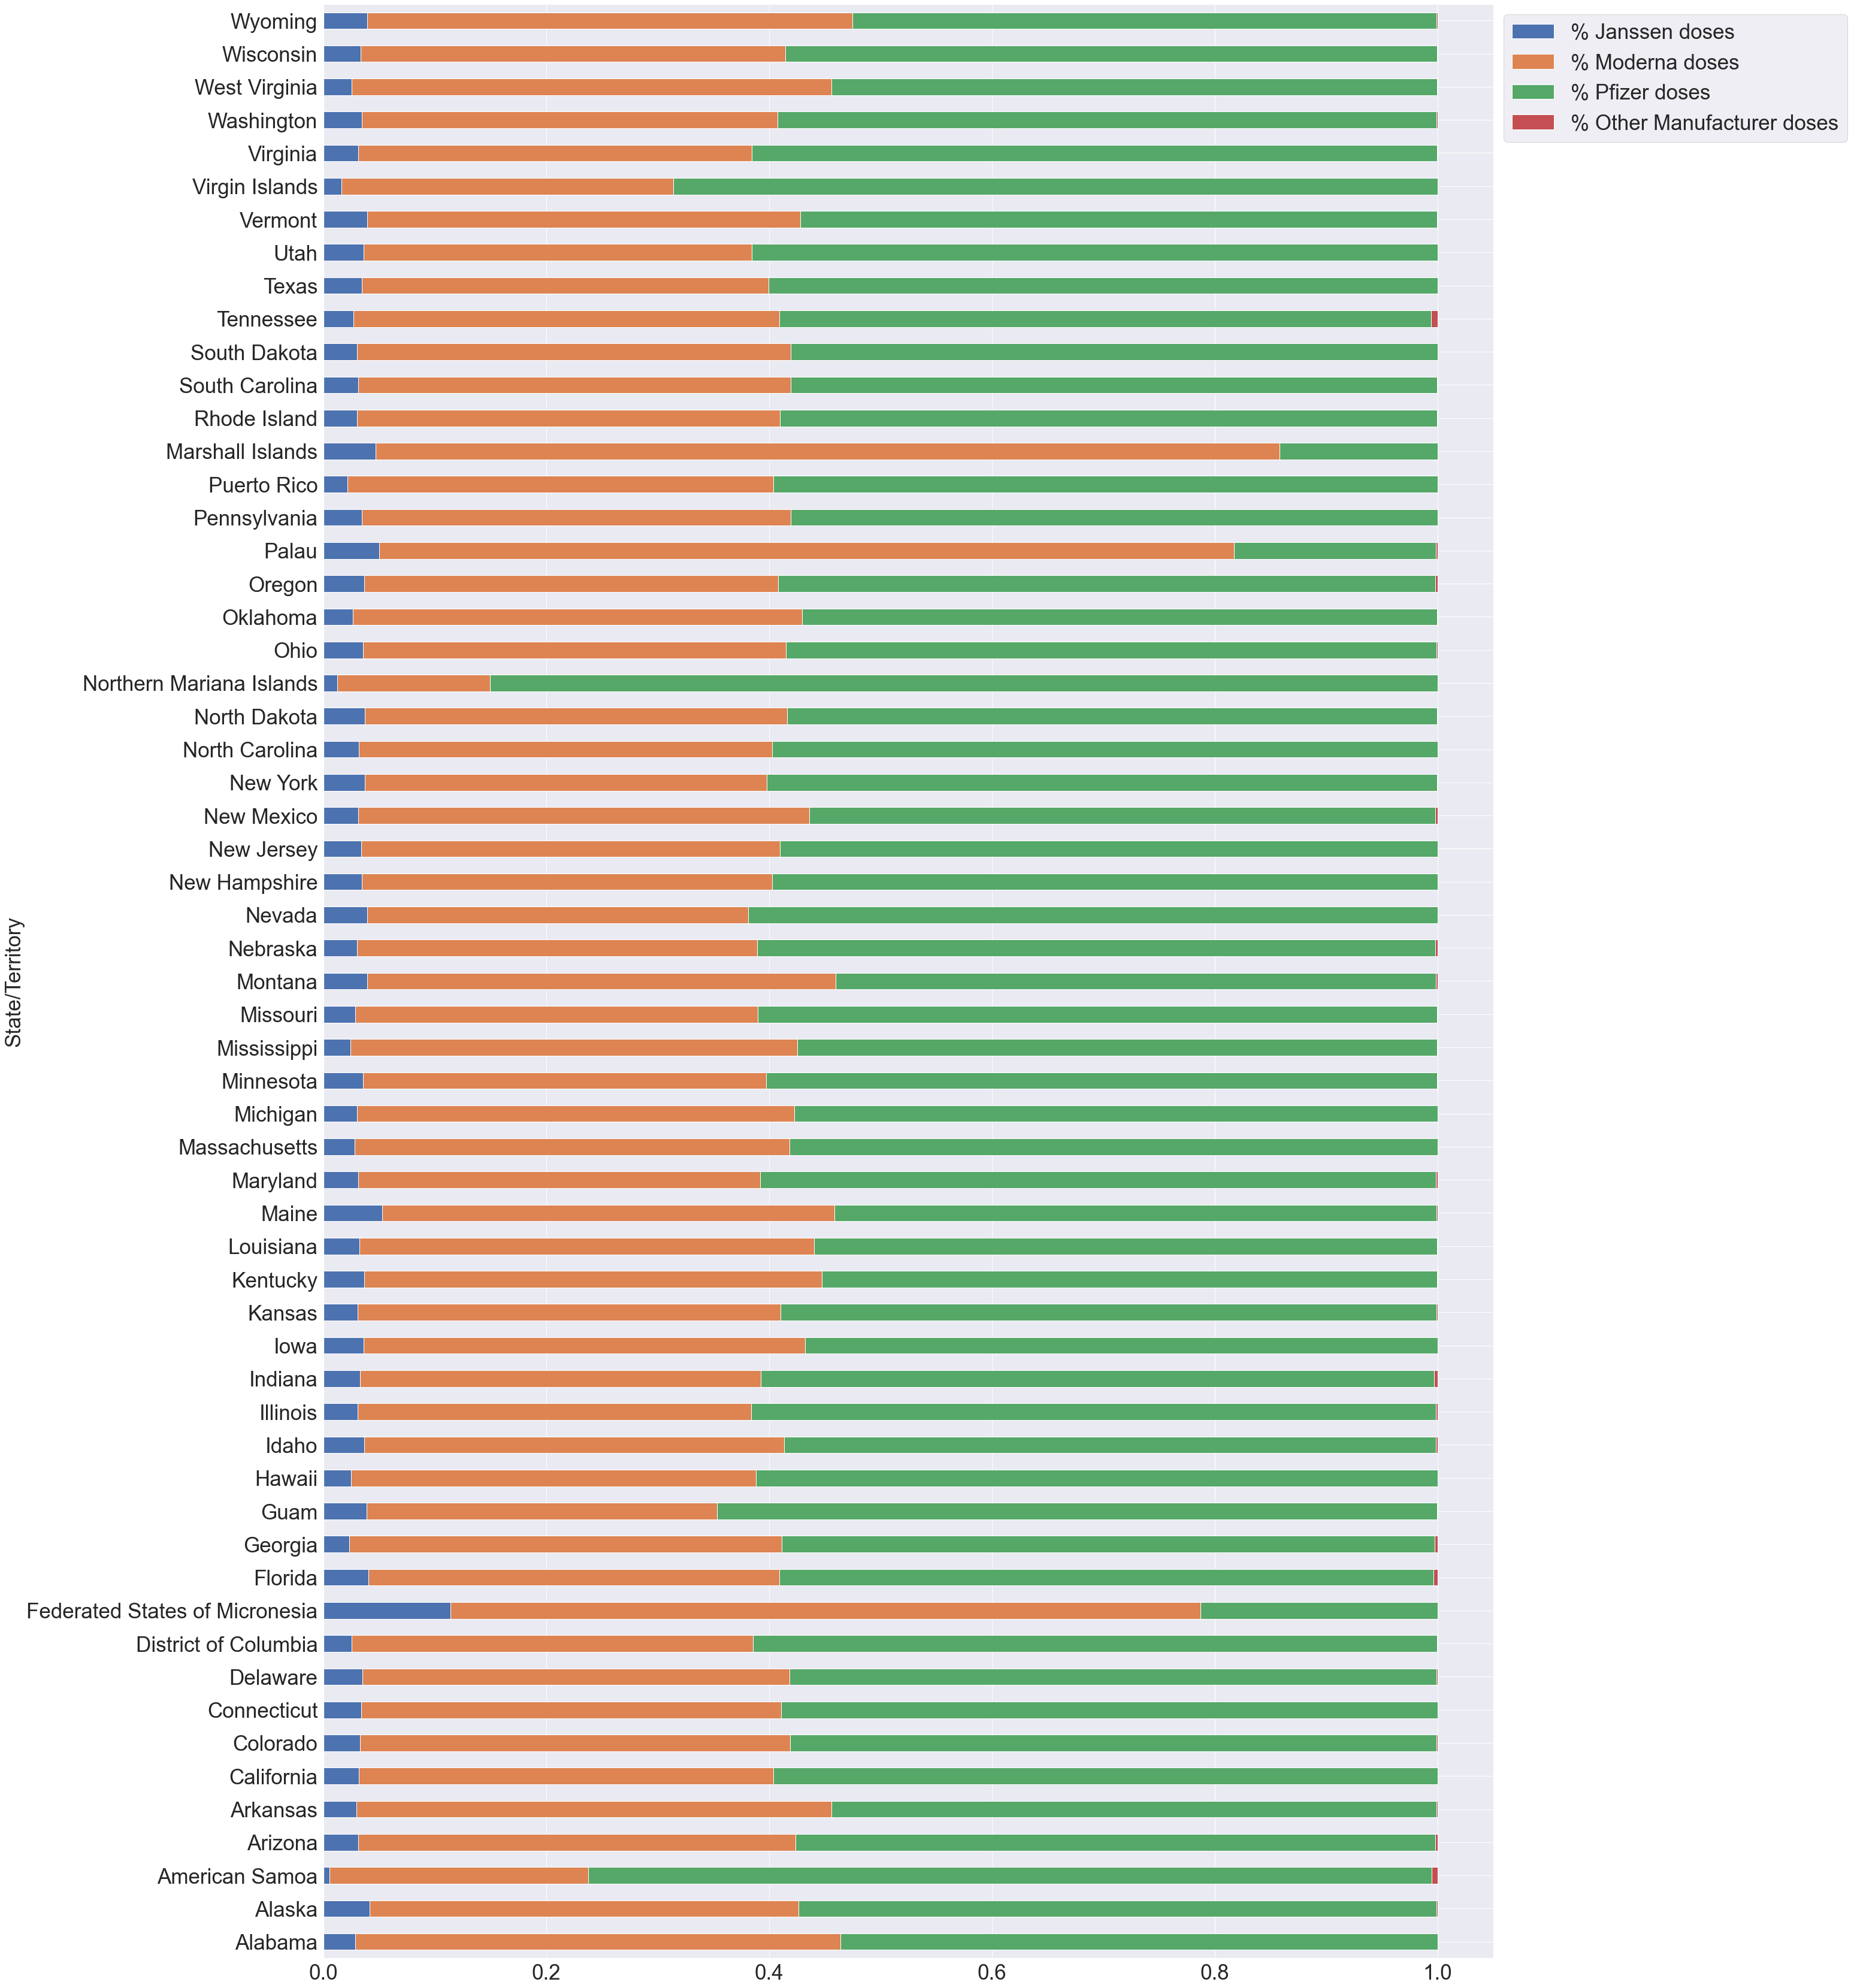

In [26]:
def plotstackedbar():
    plt.rcParams["figure.figsize"] = (35,60)

    vaccinebarplt=vaccinebystatecopy[['State/Territory', '% Janssen doses', '% Moderna doses', '% Pfizer doses', '% Other Manufacturer doses']]
    vaccinebarplt.set_index('State/Territory', inplace=True)

    vaccinebarplt[['% Janssen doses', '% Moderna doses', '% Pfizer doses', '% Other Manufacturer doses']].plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1,1), prop={'size': 35})
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)
    plt.ylabel('State/Territory', fontsize=35)
    plt.show()
    return
    
plotstackedbar()

                                  % Janssen doses  % Moderna doses  \
% Janssen doses                             1.000            0.627   
% Moderna doses                             0.627            1.000   
% Pfizer doses                             -0.699           -0.995   
% Other Manufacturer doses                 -0.157           -0.099   
Total Cases of Vaccinated People           -0.059           -0.127   

                                  % Pfizer doses  % Other Manufacturer doses  \
% Janssen doses                           -0.699                      -0.157   
% Moderna doses                           -0.995                      -0.099   
% Pfizer doses                             1.000                       0.099   
% Other Manufacturer doses                 0.099                       1.000   
Total Cases of Vaccinated People           0.123                       0.018   

                                  Total Cases of Vaccinated People  
% Janssen doses              

<AxesSubplot:>

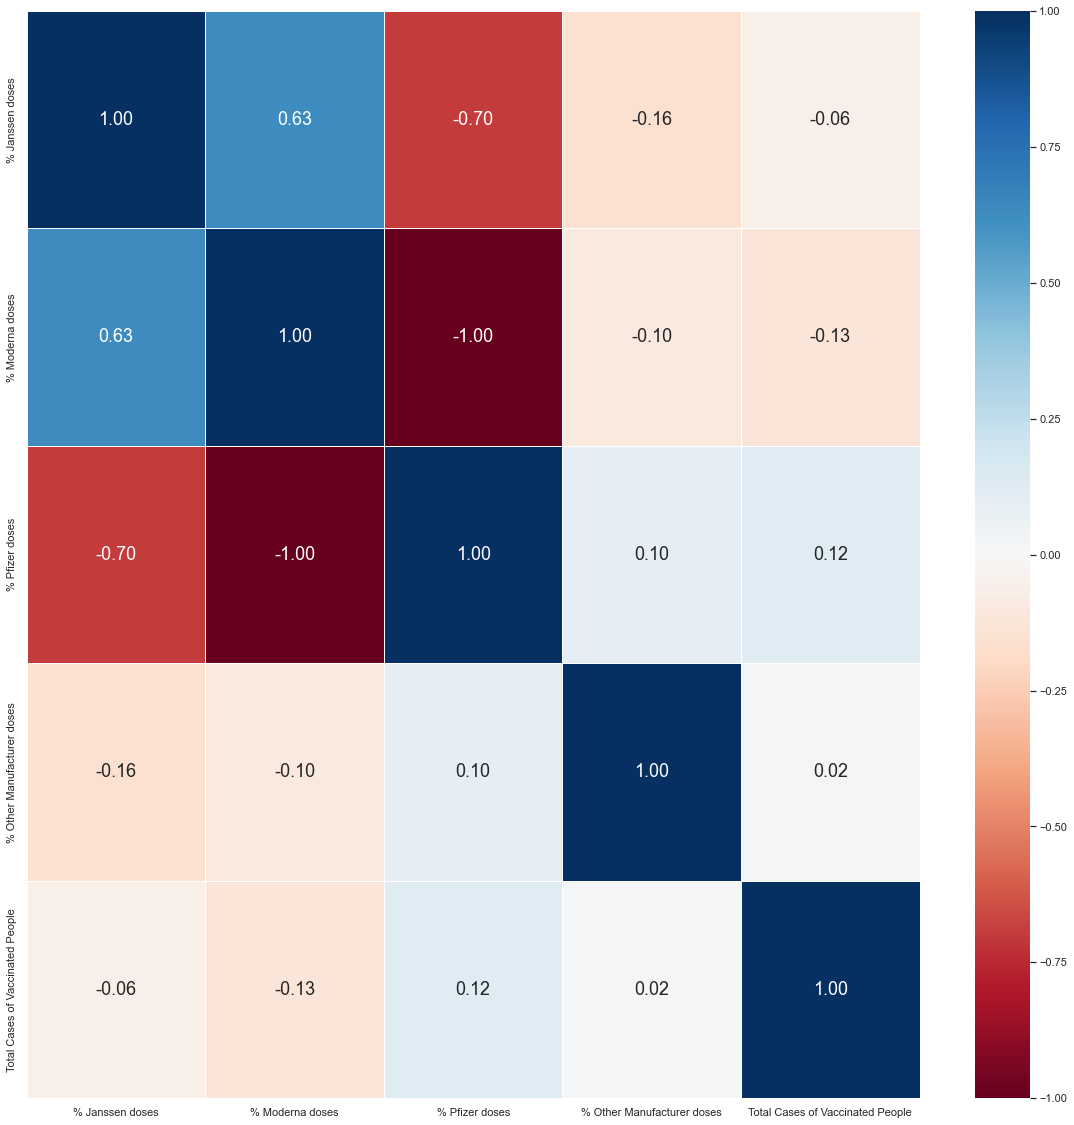

In [27]:
# Correlation Matrix for the different vaccine types and covid cases
vaccinedata= pd.DataFrame(vaccinebystatecopy[['% Janssen doses', '% Moderna doses', '% Pfizer doses', '% Other Manufacturer doses','Total Cases of Vaccinated People']])
print(vaccinedata.corr())

# Heatmap of the Correlation Matrix for the different vaccine types and covid cases
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(vaccinedata.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Above map and graphs justify the reason for us to perform analysis and regression on California

# Exploratory Analysis

In [28]:
#Extracting CA datas
selectedDF = dailycovidDF[dailycovidDF['state'] =='CA']
selectedDF.head()

Date state  tot_cases  conf_cases  prob_cases  new_case  pnew_case  \
27   14/12/20    CA    1585044 1585044.000       0.000     33278      0.000   
91   15/12/20    CA    1617370 1617370.000       0.000     32326      0.000   
131  16/12/20    CA    1671081 1671081.000       0.000     53711      0.000   
208  17/12/20    CA    1723362 1723362.000       0.000     52281      0.000   
248  18/12/20    CA    1764374 1764374.000       0.000     41012      0.000   

     tot_death  conf_death  prob_death  ...  Series_Complete_5PlusPop_Pct  \
27       21088   21088.000       0.000  ...                         0.000   
91       21178   21178.000       0.000  ...                         0.000   
131      21410   21410.000       0.000  ...                         0.000   
208      21817   21817.000       0.000  ...                         0.000   
248      22080   22080.000       0.000  ...                         0.000   

     Administered_5Plus Admin_Per_100k_5Plus Distributed_Per_100k_5Plus  \
27                0.000                0.000                      0.000   
91                0.000                0.000                      0.000   
131               0.000                0.000                      0.000   
208               0.000                0.000                      0.000   
248               0.000                0.000                      0.000   

    Series_Complete_Moderna_5Plus  Series_Complete_Pfizer_5Plus  \
27                          0.000                         0.000   
91                          0.000                         0.000   
131                         0.000                         0.000   
208                         0.000                         0.000   
248                         0.000                         0.000   

     Series_Complete_Janssen_5Plus  Series_Complete_Unk_Manuf_5Plus  \
27                           0.000                            0.000   
91                           0.000                            0.000   
131                          0.000                            0.000   
208                          0.000                            0.000   
248                          0.000                            0.000   

     Unnamed: 82  Unnamed: 83  
27         0.000        0.000  
91         0.000        0.000  
131        0.000        0.000  
208        0.000        0.000  
248        0.000        0.000  

[5 rows x 96 columns]

In [29]:
# Selecting datas that we need
caDF = selectedDF[['Date','tot_cases','tot_death','Administered']].copy()
caDF

Date  tot_cases  tot_death  Administered
27     14/12/20    1585044      21088             0
91     15/12/20    1617370      21178             0
131    16/12/20    1671081      21410             4
208    17/12/20    1723362      21817           273
248    18/12/20    1764374      22080           273
...         ...        ...        ...           ...
26279   27/3/22    9074163      87809      72551454
26333   28/3/22    9081332      87954      72561187
26400   29/3/22    9082073      87956      72569239
26449   30/3/22    9084834      88043      72578129
26529   31/3/22    9091230      88115      72651052

[473 rows x 4 columns]

In [30]:
pd.set_option('display.max_rows', 10)

In [31]:
caDF=selectedDF[['Date', 'new_case', 'new_death', 'Administered_Dose1_Recip', 'Series_Complete_Yes']]
caDF.reset_index(drop=True)

Date  new_case  new_death  Administered_Dose1_Recip  \
0    14/12/20     33278         93                         0   
1    15/12/20     32326         90                         0   
2    16/12/20     53711        232                         0   
3    17/12/20     52281        407                         0   
4    18/12/20     41012        263                         0   
..        ...       ...        ...                       ...   
468   27/3/22         0          0                  32584419   
469   28/3/22      7169        145                  32587692   
470   29/3/22       741          2                  32590242   
471   30/3/22      2761         87                  32593157   
472   31/3/22      6396         72                  32610351   

     Series_Complete_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
468             28079557  
469             28081845  
470             28083751  
471             28085991  
472             28100914  

[473 rows x 5 columns]

In [32]:
# Getting new Doses and new Series completed from a cumulative data
newcaDF=caDF.copy()
newdose1 = caDF['Administered_Dose1_Recip'].diff()
newseriescomplete = caDF['Series_Complete_Yes'].diff()

newcaDF['new_Dose1_administered']=newdose1
newcaDF['new_Series_completed']=newseriescomplete
newcaDF.fillna({'new_Dose1_administered': 0, 'new_Series_completed': 0}, inplace=True)
newcaDF

Date  new_case  new_death  Administered_Dose1_Recip  \
27     14/12/20     33278         93                         0   
91     15/12/20     32326         90                         0   
131    16/12/20     53711        232                         0   
208    17/12/20     52281        407                         0   
248    18/12/20     41012        263                         0   
...         ...       ...        ...                       ...   
26279   27/3/22         0          0                  32584419   
26333   28/3/22      7169        145                  32587692   
26400   29/3/22       741          2                  32590242   
26449   30/3/22      2761         87                  32593157   
26529   31/3/22      6396         72                  32610351   

       Series_Complete_Yes  new_Dose1_administered  new_Series_completed  
27                       0                   0.000                 0.000  
91                       0                   0.000                 0.000  
131                      0                   0.000                 0.000  
208                      0                   0.000                 0.000  
248                      0                   0.000                 0.000  
...                    ...                     ...                   ...  
26279             28079557                8051.000              7440.000  
26333             28081845                3273.000              2288.000  
26400             28083751                2550.000              1906.000  
26449             28085991                2915.000              2240.000  
26529             28100914               17194.000             14923.000  

[473 rows x 7 columns]

In [33]:
# Line graph of variables per day
fig = px.line(newcaDF, x='Date', y=['new_case', 'new_death', 'new_Dose1_administered', 'new_Series_completed'], 
              labels={'value':'Count'})

    
fig.show()

<AxesSubplot:>

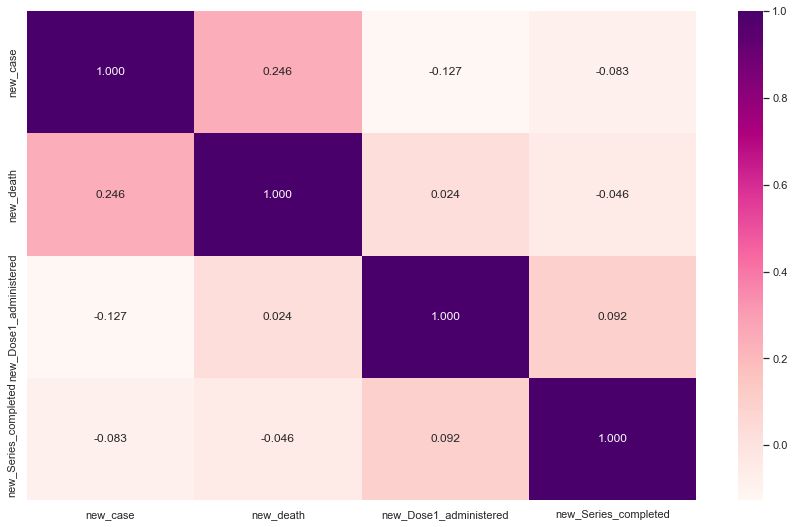

In [34]:
f=plt.figure(figsize=(15,9))
sb.heatmap(newcaDF[['new_case', 'new_death', 'new_Dose1_administered', 'new_Series_completed']].corr(), annot=True, fmt='.3f', cmap='RdPu')

# Regression

Explained Variance for Training (R^2)	: 0.08883607436406427
Explained Variance for Testing (R^2)	: 0.018318381504767167
Mean Squared Error for Training Set 	: 25129.284067992718
Mean Squared Error for Testing Set 	: 35116.20210781296


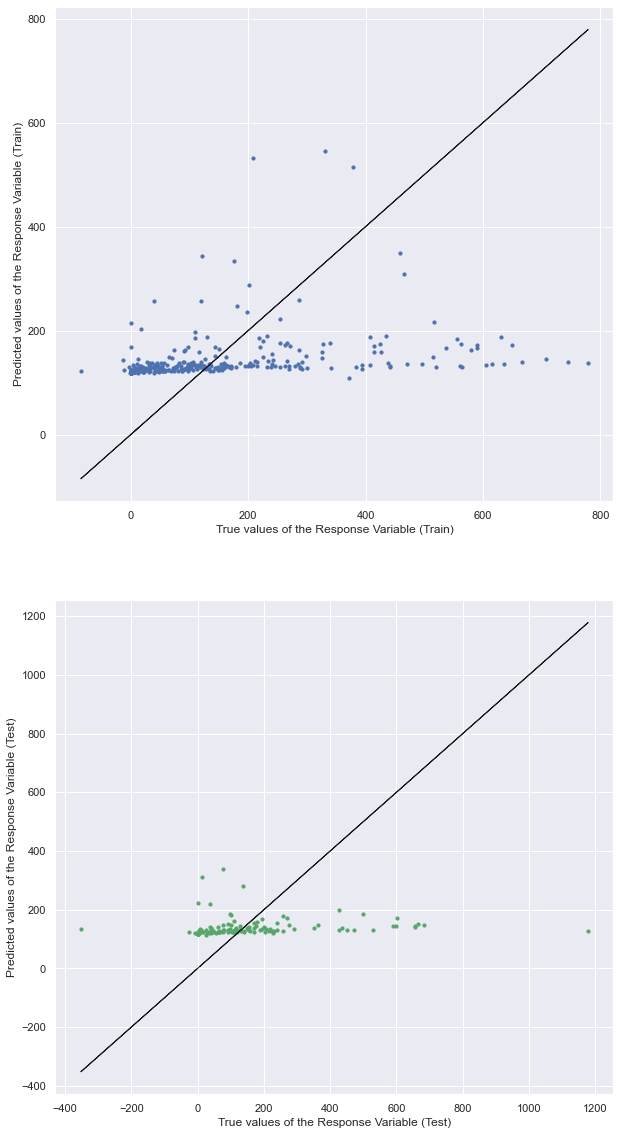

In [116]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def LQ_MultiVar(dataframe, predictor_list, response_str, test_ratio, model = LinearRegression()):
    """Procedure. Given the list of the predictors and the response
    perform a train test split based on a percentage and
    fit a regression model.
    """
    X = pd.DataFrame(dataframe[predictor_list])
    y = pd.DataFrame(dataframe[response_str])
    linreg = model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)
    
    linreg.fit(X_train, y_train)
    
    if model == LinearRegression():
        print('Gradient:\t m = ', linreg.coef_)
        print('Intercept:\t c = ', linreg.intercept_)
    
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    print("Explained Variance for Training (R^2)\t:", linreg.score(X_train, y_train))
    print("Explained Variance for Testing (R^2)\t:", linreg.score(X_test, y_test))
    print("Mean Squared Error for Training Set \t:", mean_squared_error(y_train, y_train_pred))
    print("Mean Squared Error for Testing Set \t:", mean_squared_error(y_test, y_test_pred))
    
    f, axes = plt.subplots(2, 1, figsize=(10, 20))
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    axes[0].scatter(x = y_train,
                    y = y_train_pred,
                    s = 10,
                    c = 'b')
    axes[0].plot(y_train, y_train, 'k-', linewidth= 1) # Diagonal line
    axes[1].plot(y_test, y_test, 'k-', linewidth= 1) # Diagonal line
    axes[1].scatter(x = y_test, 
                    y = y_test_pred, 
                    s = 10,
                    c = "g")
    plt.show()
    
LQ_MultiVar(newcaDF, ['new_case', 'new_Dose1_administered', 'new_Series_completed'], 'new_death', 0.3, model = LinearRegression())

/var/folders/qk/ws4r1c7s7qbc4dz79j9_z7yr0000gn/T/ipykernel_800/724244696.py:19: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Explained Variance for Training (R^2)	: 0.914864920440742
Explained Variance for Testing (R^2)	: 0.6241239817296325
Mean Squared Error for Training Set 	: 2610.9917779456196
Mean Squared Error for Testing Set 	: 10741.273957746478


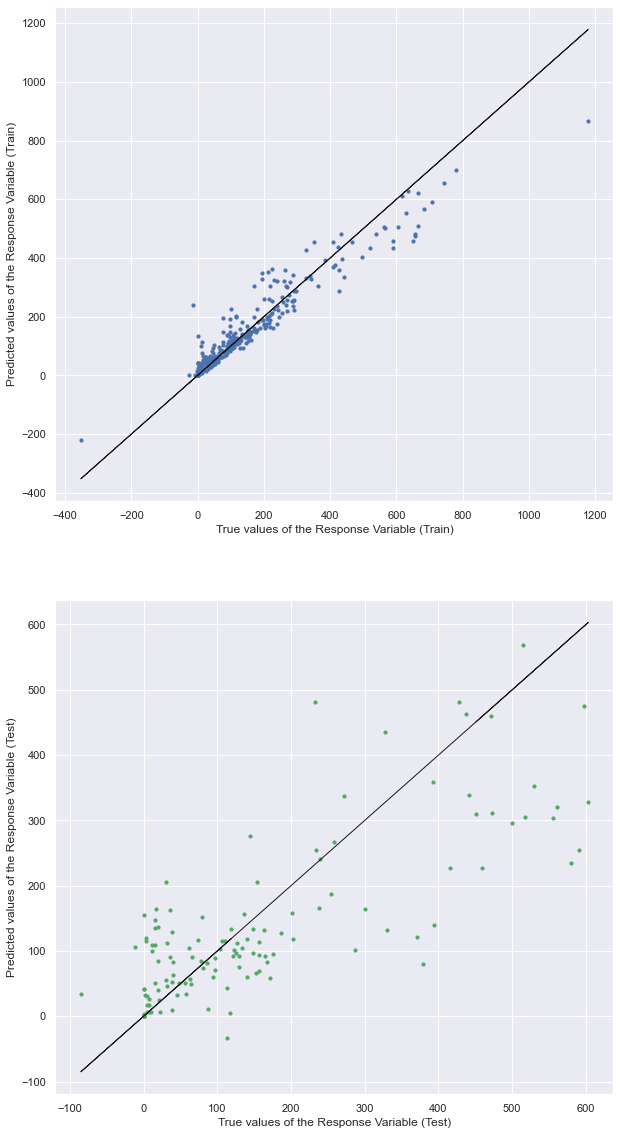

In [117]:
from sklearn.ensemble import RandomForestRegressor

LQ_MultiVar(newcaDF, ['new_case', 'new_Dose1_administered', 'new_Series_completed'], 'new_death', 0.3, model = RandomForestRegressor())

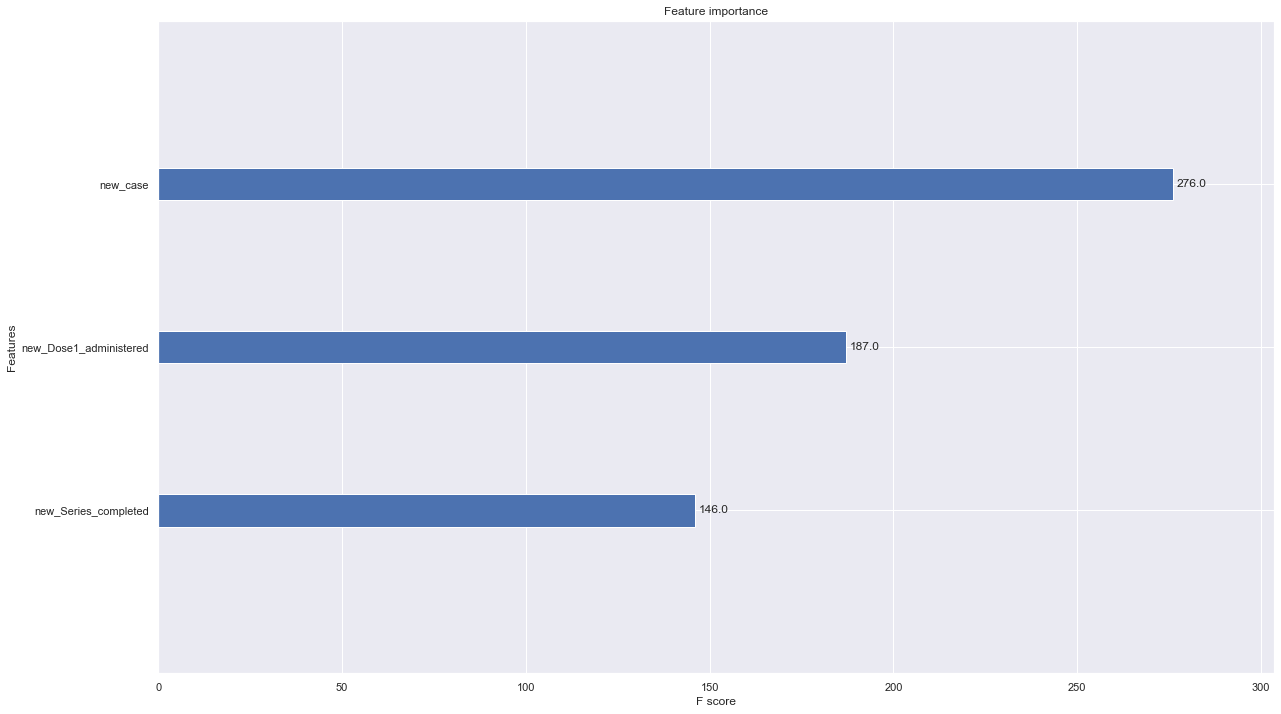

Explained Variance (R^2) on Train Set 	: 0.826991894461026
MSE on Train Set                       	: 5264.838958088323
Explained Variance (R^2) on Test Set 	: 0.541624311978814
MSE on Test Set                     	: 12689.986934492512


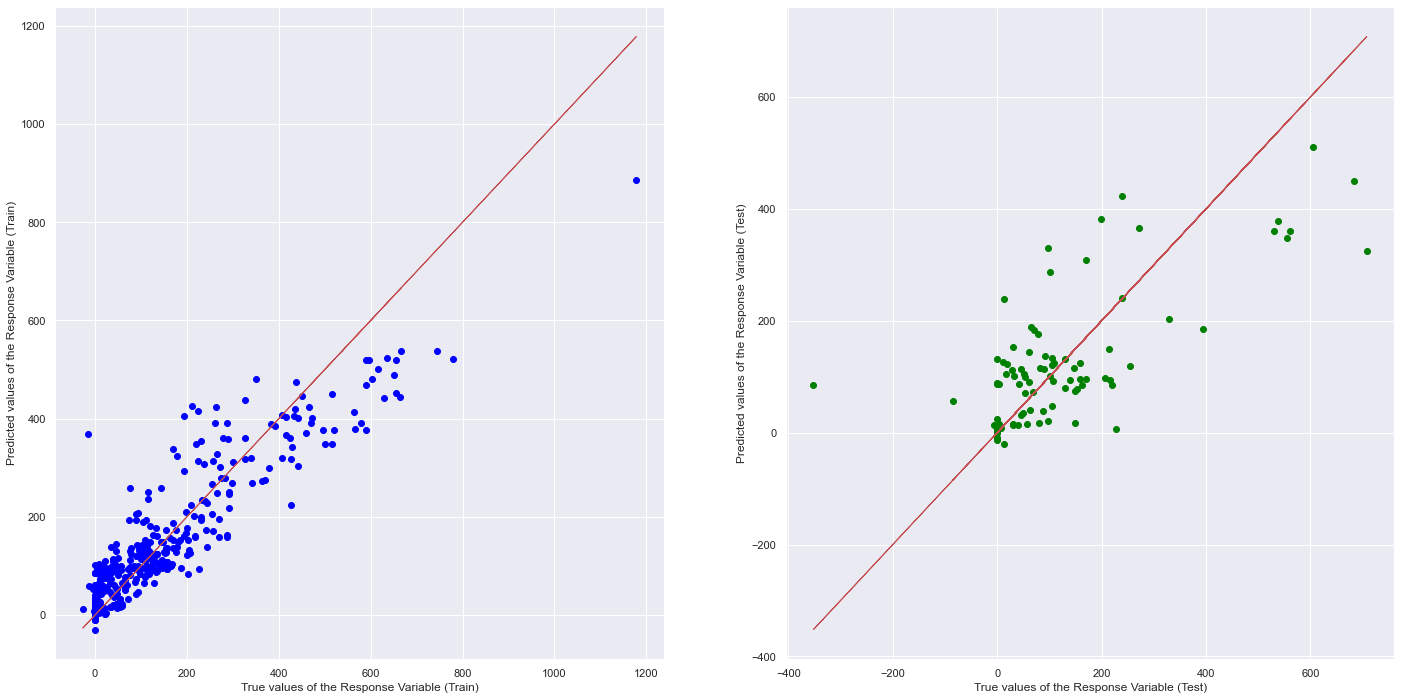

In [138]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

boostX = pd.DataFrame(newcaDF[['new_case','new_Dose1_administered','new_Series_completed']])
boosty = pd.DataFrame(newcaDF['new_death'])
boostX_train, boostX_test, boosty_train, boosty_test = train_test_split(boostX, boosty, test_size = 0.2)
boostX_train.shape, boostX_test.shape

bestmodel = XGBRegressor (n_estimators=100, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8)


bestmodel.fit(boostX_train, boosty_train)

plt.rcParams["figure.figsize"] = (20,12)
xgb.plot_importance(bestmodel, ax=plt.gca())
plt.show()

boostpred_train = bestmodel.predict(boostX_train)

from sklearn.metrics import mean_squared_error, r2_score
print("Explained Variance (R^2) on Train Set \t:", r2_score(boosty_train,boostpred_train))
print("MSE on Train Set                       \t:", mean_squared_error(boosty_train,boostpred_train))

boostpred_test = bestmodel.predict(boostX_test)
print("Explained Variance (R^2) on Test Set \t:", r2_score(boosty_test,boostpred_test))
print("MSE on Test Set                     \t:",mean_squared_error(boosty_test,boostpred_test))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(boosty_train, boostpred_train, color = "blue")
axes[0].plot(boosty_train, boosty_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(boosty_test, boostpred_test, color = "green")
axes[1].plot(boosty_test, boosty_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


### Prediction for new deaths of CA for 1st week of April using XGBoost Model

In [139]:
aprildata = pd.read_csv('April Covid Data.csv')
aprildata.head()

Date Location  Administered_Dose1_Recip  Series_Complete_Yes  new_case  \
0  1/4/22       CA                      8781                 7508      4244   
1  2/4/22       CA                      8737                 7887      2697   
2  3/4/22       CA                      9573                 9256      2186   
3  4/4/22       CA                      6266                 5554      2093   
4  5/4/22       CA                      4147                 3110      2395   

   new_death  
0         92  
1         36  
2         41  
3         38  
4         52

In [140]:
dataforPred = pd.DataFrame(aprildata[['new_case','Administered_Dose1_Recip','Series_Complete_Yes']])
dataforPred

new_case  Administered_Dose1_Recip  Series_Complete_Yes
0      4244                      8781                 7508
1      2697                      8737                 7887
2      2186                      9573                 9256
3      2093                      6266                 5554
4      2395                      4147                 3110

In [141]:
deathProb = bestmodel.predict(dataforPred)
print(deathProb)

[ 75.119484  87.15359  171.10825   63.70037   40.1693  ]


In [142]:
predDeath = pd.DataFrame({'Date': aprildata['Date'],'Actual Death': aprildata['new_death'], 
                          'Predicted Death': np.round(deathProb)})
predDeath.head()

Date  Actual Death  Predicted Death
0  1/4/22            92           75.000
1  2/4/22            36           87.000
2  3/4/22            41          171.000
3  4/4/22            38           64.000
4  5/4/22            52           40.000